# **Phase 1**

## **1: Problem Statement**

### **1.1.1 Problem Statement**
This project’s goal is to make a detailed analysis on why road accidents are occurring a lot and in what trend, will be helpful in improving road safety measures & make the policy options which can reduce the number of accidents. This research would help to know the impacts of accident severity on the driver attributes, vehicle conditions, surface conditions and environmental conditions.

### **1.1.2 Potential Contribution & Importance**
Road accidents pose a threat to health globally by resulting in significant fatalities and injuries of individuals worldwide. This evaluation plays a role in finding factors that play a vital role in accident prevention. The evidence of this review may support the implementation of measures of safety, improvement of driver education programs, and modification of road systems that can reduce accidents and save lives.

## **2: Ask Questions**

#### Harshit Malpani: 50608809

#### Question 1:
What vehicles should the authorities focus more on to reduce the cases of road accidents and the severity of road accidents
Analyzing the type of vehicle involved in road accidents can help identify what vehicle type needs improvement in the technology. More technologies like Airbags, ABS brakes etc. can be augmented in those vehicles to improve their safety ratings and reduce life loss due to accidents

#### Question 2:
Does the service period of the vehicle and ownership of the vehicle have any correlation with the accidents.<br>The state of vehicle and the person driving it plays an important role in road safety. We need to find out how the state of the vehicle and the ownership of the vehicle affect the possibility of a vehicle to be involved in an accident. This study will help in making policies and rules to reduce road accidents and related casualties.

## **3: Data Retrieval**

The dataset has been taken from [KAGGLE](https://www.kaggle.com/datasets/saurabhshahane/road-traffic-accidents/data). For this task, we have uploaded a copy of the dataset to a GitHub repository and downloaded the data from the GitHub repository directly to the data frame

In [1]:
import pandas as pd

dataset = pd.read_csv('https://raw.githubusercontent.com/hmalpani/RTA-Dataset/main/RTA_Dataset.csv')

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [3]:
dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


## **4: Data Cleaning**

### 1) Remove Duplicate Values:
Removing duplicate values is an essential step of data cleaning for any data science project. It helps in reducing the bias where certain data points are represented multiple times. If the duplicate values are not removed, it can skew the results and therefore lead to incorrect conclusions

In [4]:
# Remove duplicates
cleaned_dataset = dataset.drop_duplicates()

### 2) Validation
This step of data cleaning is done to validate that the data in the dataset is useful for the problem we are solving

In [5]:
# Remove entries with 'Number_of_vehicles_involved' = 0
cleaned_dataset = cleaned_dataset[cleaned_dataset['Number_of_vehicles_involved'] != 0]

### 3) Detection and Removal of Outliers
Outliers in the data can impact the decision making using the analytics from the data. We should detect and process the outliers

In [6]:
numerical_columns = ['Number_of_vehicles_involved', 'Number_of_casualties']
for column in numerical_columns:
    if not pd.api.types.is_numeric_dtype(cleaned_dataset[column]):
        print(f"Column '{column}' should be numeric but contains non-numeric data.")

def detect_outliers(column):
    Q1 = cleaned_dataset[column].quantile(0.05)
    Q3 = cleaned_dataset[column].quantile(0.95)
    IQR = Q3 - Q1
    outliers = cleaned_dataset[(cleaned_dataset[column] < (Q1 - 1.5 * IQR)) | (cleaned_dataset[column] > (Q3 + 1.5 * IQR))]
    return outliers

for column in numerical_columns:
    outliers = detect_outliers(column)
    if not outliers.empty:
        print(f"Outliers detected in column '{column}':\n", outliers.shape)

def remove_outliers(df, column):
    Q1 = cleaned_dataset[column].quantile(0.05)
    Q3 = cleaned_dataset[column].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return cleaned_dataset[(cleaned_dataset[column] >= lower_bound) & (cleaned_dataset[column] <= upper_bound)]

print("Shape before removing outliers:", cleaned_dataset.shape)
cleaned_dataset = remove_outliers(cleaned_dataset, 'Number_of_vehicles_involved')
cleaned_dataset = remove_outliers(cleaned_dataset, 'Number_of_casualties')

print("Shape after removing outliers:", cleaned_dataset.shape)

Outliers detected in column 'Number_of_vehicles_involved':
 (7, 32)
Shape before removing outliers: (12316, 32)
Shape after removing outliers: (12309, 32)


### 4) Handling Missing Values:
In this step of Data Cleaning, we either remove or impute the missing values in the dataset

In [7]:
# Number of missing values
missing_value_count = cleaned_dataset.isnull().sum()
missing_value_count

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3923
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                306
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [8]:
dataset_columns = cleaned_dataset.columns.tolist()
missing_values_columns = missing_value_count[missing_value_count > 0].index.tolist()
print(missing_values_columns)

['Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Type_of_collision', 'Vehicle_movement', 'Work_of_casuality', 'Fitness_of_casuality']


In [10]:
# Replace missing values
cleaned_dataset['Educational_level'].fillna(cleaned_dataset['Educational_level'].mode()[0], inplace=True)
cleaned_dataset['Vehicle_driver_relation'].fillna('Unknown', inplace=True)
cleaned_dataset['Driving_experience'].fillna(cleaned_dataset['Driving_experience'].mode()[0], inplace=True)
cleaned_dataset['Type_of_vehicle'].fillna('Unknown', inplace=True)
cleaned_dataset['Owner_of_vehicle'].fillna('Unknown', inplace=True)
cleaned_dataset['Service_year_of_vehicle'].fillna('Unknown', inplace=True)
cleaned_dataset['Defect_of_vehicle'].fillna('No defect', inplace=True)
cleaned_dataset['Area_accident_occured'].fillna('Unknown', inplace=True)
cleaned_dataset['Lanes_or_Medians'].fillna('Unknown', inplace=True)
cleaned_dataset['Road_allignment'].fillna('Unknown', inplace=True)
cleaned_dataset['Types_of_Junction'].fillna('Unknown', inplace=True)
cleaned_dataset['Road_surface_type'].fillna('Unknown', inplace=True)
cleaned_dataset['Type_of_collision'].fillna('Unknown', inplace=True)
cleaned_dataset['Vehicle_movement'].fillna('Unknown', inplace=True)
cleaned_dataset['Work_of_casuality'].fillna('Unknown', inplace=True)
cleaned_dataset['Fitness_of_casuality'].fillna('Unknown', inplace=True)

### 5) Correcting Errors:
In this data cleaning, we identify and fix the errors or incosistencies present in the data

In [11]:
cleaned_dataset['Type_of_vehicle'] = cleaned_dataset['Type_of_vehicle'].replace('Lorry (41?100Q)', 'Lorry (41 - 100 Q)')
cleaned_dataset['Type_of_vehicle'] = cleaned_dataset['Type_of_vehicle'].replace('Lorry (11?40Q)', 'Lorry (11 - 40 Q)')
cleaned_dataset['Type_of_vehicle'] = cleaned_dataset['Type_of_vehicle'].replace('Public (13?45 seats)', 'Public (13 - 45 seats)')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace('  Recreational areas', 'Recreational areas')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace('  Market areas', 'Market areas')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace(' Church areas', 'Church areas')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace(' Hospital areas', 'Hospital areas')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace(' Industrial areas', 'Industrial areas')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace(' Outside rural areas', 'Outside rural areas')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace('Rural village areasOffice areas', 'Rural Office areas')
cleaned_dataset['Road_allignment'] = cleaned_dataset['Road_allignment'].replace('Tangent road with mountainous terrain and', 'Tangent road with mountainous terrain')
cleaned_dataset['Fitness_of_casuality'] = cleaned_dataset['Fitness_of_casuality'].replace('NormalNormal', 'Normal')
cleaned_dataset['Casualty_severity'] = cleaned_dataset['Casualty_severity'].replace('na', 'Unknown')

### 6) Standardize the Data
a) Convert all the entries in `Time` column to a consistent format.<br>
b) Convert `Over 51` to `51 and Over` in the `Age_band_of_driver` column

In [12]:
# Standardize the 'Time' column
cleaned_dataset['Time'] = pd.to_datetime(cleaned_dataset['Time'], format='%H:%M:%S').dt.time
# Make 'Over 51' to '51 and Over' for Driver Age band
cleaned_dataset['Age_band_of_driver'] = cleaned_dataset['Age_band_of_driver'].replace('Over 51', '51 and Over')

### 7) Parsing the data
Convert all the text in the dataset to lowercase to ensure consistency. This helps in avoiding the situations where same words with different cases are considered different

In [13]:
# Make all the characters to lowercase
cleaned_dataset = cleaned_dataset.map(lambda x: x.lower() if isinstance(x, str) else x)

### 8) Feature Engineering
Using the existing columns, we create new features which helps in finding new patterns in the data

In [14]:
print(cleaned_dataset['Time'].head())
cleaned_dataset['Hour'] = pd.to_datetime(cleaned_dataset['Time'], format='%H:%M:%S').dt.hour
Time_of_day = ['Night', 'Morning', 'Noon', 'Evening']

def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 2
    elif 12 <= hour < 17:
        return 3
    elif 17 <= hour < 21:
        return 4
    else:
        return 1


cleaned_dataset['Time_of_day'] = cleaned_dataset['Hour'].apply(categorize_time_of_day)

print("Data head after categorizing and encoding Time_of_day:\n")
cleaned_dataset[['Time', 'Hour', 'Time_of_day']].head()


0    17:02:00
1    17:02:00
2    17:02:00
3    01:06:00
4    01:06:00
Name: Time, dtype: object
Data head after categorizing and encoding Time_of_day:



,Time,Hour,Time_of_day
0,17:02:00,17,4
1,17:02:00,17,4
2,17:02:00,17,4
3,01:06:00,1,1
4,01:06:00,1,1


### 9) Ordinal & One Hot Encoding
Categorical data should be converted so that they can be fed to the algorithms that are used on the data

In [15]:
from sklearn.preprocessing import OneHotEncoder

encoding_dict = {
    'Day_of_week': 'ordinal',
    'Age_band_of_driver': 'ordinal',
    'Sex_of_driver': 'one_hot',
    'Educational_level': 'ordinal',
    'Vehicle_driver_relation': 'one_hot',
    'Driving_experience': 'ordinal',
    'Type_of_vehicle': 'one_hot',
    'Owner_of_vehicle': 'one_hot',
    'Service_year_of_vehicle': 'ordinal',
    'Defect_of_vehicle': 'one_hot',
    'Area_accident_occured': 'one_hot',
    'Lanes_or_Medians': 'one_hot',
    'Road_allignment': 'one_hot',
    'Types_of_Junction': 'one_hot',
    'Road_surface_type': 'one_hot',
    'Road_surface_conditions': 'ordinal',
    'Light_conditions': 'one_hot',
    'Weather_conditions': 'one_hot',
    'Type_of_collision': 'one_hot',
    'Vehicle_movement': 'one_hot',
    'Casualty_class': 'one_hot',
    'Sex_of_casualty': 'one_hot',
    'Age_band_of_casualty': 'ordinal',
    'Casualty_severity': 'ordinal',
    'Work_of_casuality': 'one_hot',
    'Fitness_of_casuality': 'one_hot',
    'Pedestrian_movement': 'one_hot',
    'Cause_of_accident': 'one_hot',
    'Accident_severity': 'ordinal'
}

ordinal_mappings = {
    'Day_of_week': {
        'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3,
        'Friday': 4, 'Saturday': 5, 'Sunday': 6, 'Unknown': -1
    },
    'Age_band_of_driver': {
        'Under 18': 0, '18-30': 1, '31-50': 2, 'Over 51': 3, 'Unknown': -1
    },
    'Educational_level': {
        'Illiterate': 0, 'Writing & reading': 1, 'Elementary school': 2,
        'Junior high school': 3, 'High school': 4, 'Above high school': 5,
        'Unknown': -1
    },
    'Driving_experience': {
        'No Licence': 0, 'Below 1yr': 1, '1-2yr': 2, '2-5yr': 3, '5-10yr': 4,
        'Above 10yr': 5, 'unknown': -1
    },
    'Service_year_of_vehicle': {
        'Below 1yr': 0, '1-2yr': 1, '2-5yrs': 2, '5-10yrs': 3,
        'Above 10yr': 4, 'Unknown': -1
    },
    'Road_surface_conditions': {
        'Dry': 0, 'Wet or damp': 1, 'Snow': 2, 'Flood over 3cm. deep': 3, 'Unknown': -1
    },
    'Age_band_of_casualty': {
        'Under 18': 0, '18-30': 1, '31-50': 2, 'Over 51': 3, '5': 4, 'na': -1, 'Unknown': -1
    },
    'Casualty_severity': {
        '3': 0, '2': 1, '1': 2, 'na': -1, 'Unknown': -1
    },
    'Accident_severity': {
        'Slight Injury': 0, 'Serious Injury': 1, 'Fatal injury': 2, 'Unknown': -1
    }
}

def apply_encoding(df, encoding_dict, ordinal_mappings):
    one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')

    for column, encoding_type in encoding_dict.items():
        if encoding_type == 'ordinal':
            if column in ordinal_mappings:
                df[f"{column}_ordinal"] = df[column].map(ordinal_mappings[column])
            else:
                print(f"No ordinal mapping provided for column: {column}")

        elif encoding_type == 'one_hot':
            one_hot_encoded_df = pd.get_dummies(df[column], prefix=column, drop_first=True)
            df = pd.concat([df, one_hot_encoded_df], axis=1)

        else:
            print(f"Unknown encoding type: {encoding_type} for column: {column}")

    return df

cleaned_dataset = apply_encoding(cleaned_dataset, encoding_dict, ordinal_mappings)

cleaned_dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Cause_of_accident_no priority to pedestrian,Cause_of_accident_no priority to vehicle,Cause_of_accident_other,Cause_of_accident_overloading,Cause_of_accident_overspeed,Cause_of_accident_overtaking,Cause_of_accident_overturning,Cause_of_accident_turnover,Cause_of_accident_unknown,Accident_severity_ordinal
0,17:02:00,monday,18-30,male,above high school,employee,1-2yr,automobile,owner,above 10yr,...,False,False,False,False,False,False,False,False,False,NaN
1,17:02:00,monday,31-50,male,junior high school,employee,above 10yr,public (> 45 seats),owner,5-10yrs,...,False,False,False,False,False,True,False,False,False,NaN
2,17:02:00,monday,18-30,male,junior high school,employee,1-2yr,lorry (41 - 100 q),owner,unknown,...,False,False,False,False,False,False,False,False,False,NaN
3,01:06:00,sunday,18-30,male,junior high school,employee,5-10yr,public (> 45 seats),governmental,unknown,...,False,False,False,False,False,False,False,False,False,NaN
4,01:06:00,sunday,18-30,male,junior high school,employee,2-5yr,unknown,owner,5-10yrs,...,False,False,False,False,False,True,False,False,False,NaN


## **5: Exploratory Data Analysis (EDA)**

### Harshit Malpani: 50608809

#### Question 1:
What vehicles should the authorities focus more on to reduce the cases of road accidents and the severity of road accidents

##### Hypothesis 1:
Not all vehicles are involved in road accidents equally. Some vehicles have higher tendency to be involved in any road accident

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

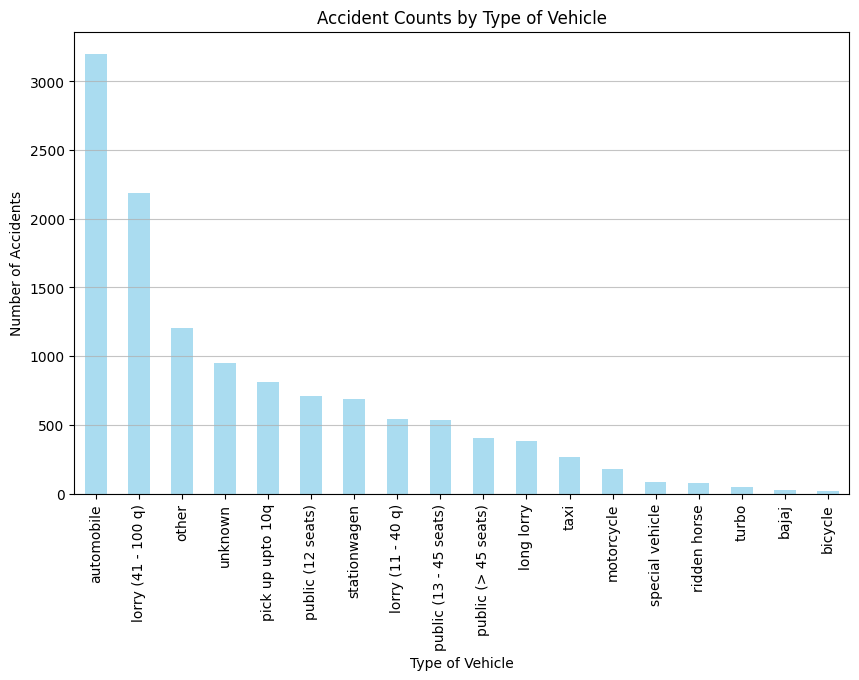

In [17]:
vehicle_counts = cleaned_dataset['Type_of_vehicle'].value_counts()
plt.figure(figsize=(10, 6))
vehicle_counts.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Accident Counts by Type of Vehicle')
plt.xlabel('Type of Vehicle')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.75)
plt.show()

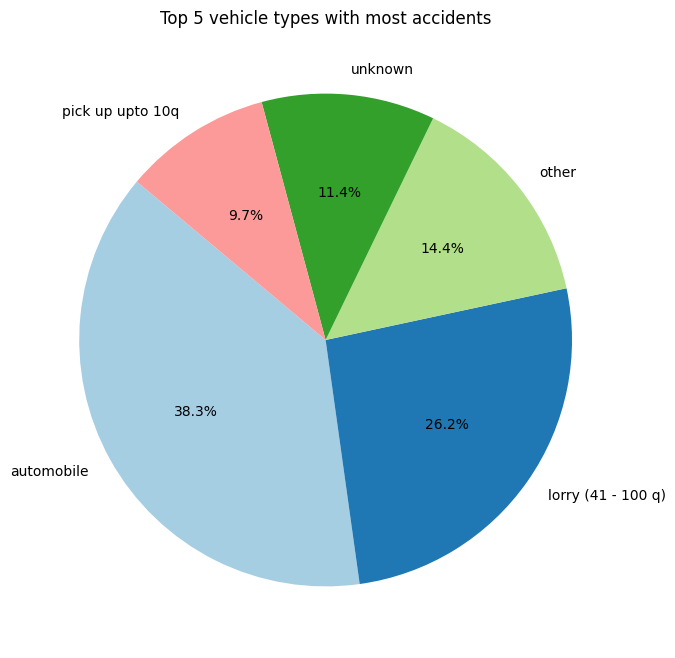

In [18]:
accidents_per_vehicle = cleaned_dataset['Type_of_vehicle'].value_counts()
accidents_per_vehicle = accidents_per_vehicle[:5]
plt.figure(figsize=(10, 8))
plt.pie(accidents_per_vehicle, labels=accidents_per_vehicle.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 5 vehicle types with most accidents')
plt.show()

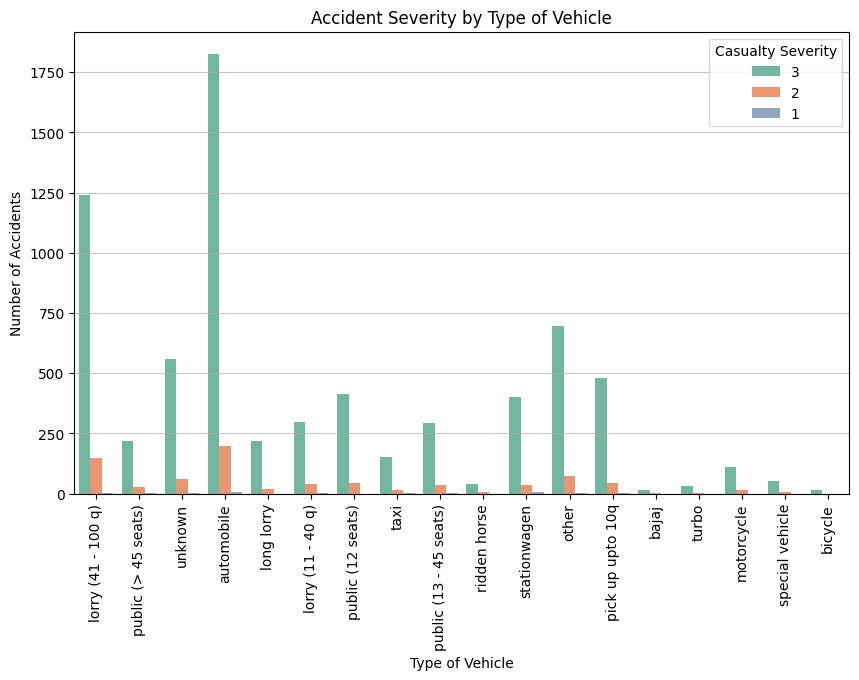

In [19]:
# Without unknown severity
without_unknown_casualty = cleaned_dataset[cleaned_dataset['Casualty_severity'] != 'unknown']
plt.figure(figsize=(10, 6))
sns.countplot(data=without_unknown_casualty, x='Type_of_vehicle', hue='Casualty_severity', palette='Set2')
plt.title('Accident Severity by Type of Vehicle')
plt.xlabel('Type of Vehicle')
plt.ylabel('Number of Accidents')
plt.legend(title='Casualty Severity')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.7)
plt.show()

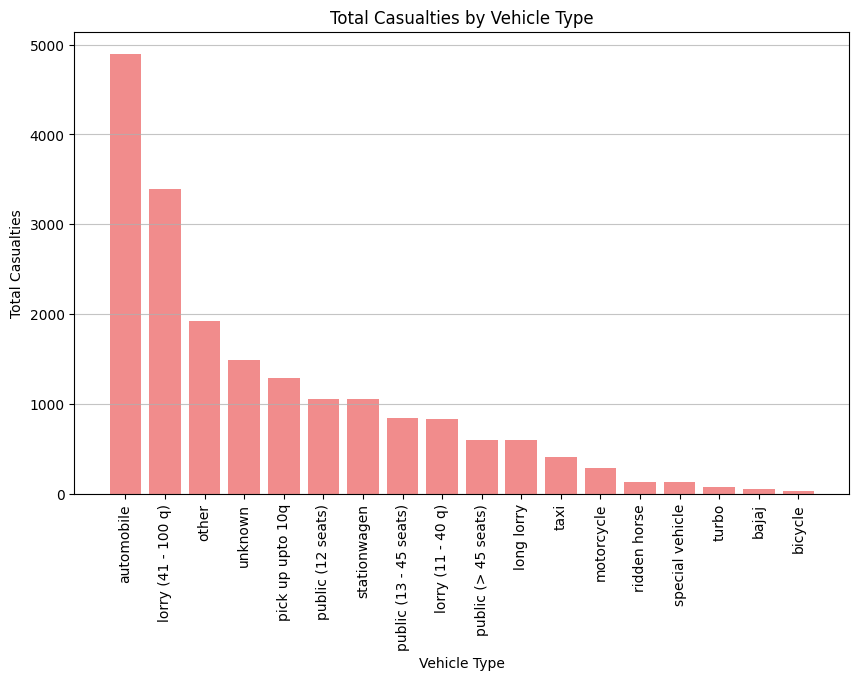

In [20]:
total_casualties_by_vehicle = cleaned_dataset.groupby('Type_of_vehicle')['Number_of_casualties'].sum().reset_index()
total_casualties_by_vehicle = total_casualties_by_vehicle.sort_values(by='Number_of_casualties', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(total_casualties_by_vehicle['Type_of_vehicle'], total_casualties_by_vehicle['Number_of_casualties'], color='lightcoral', alpha=0.9)
plt.title('Total Casualties by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Total Casualties')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.75)
plt.show()

From the above plots, we can cleary notice that `Automobile` and `Lorry(41 - 100 q)` are more probable to be involved in road accidents. More focus should be on these types of vehicles as fixing the reasons why they involve in accidents more will help reduce the road accidents which also reduces the casualties.

##### Hypothesis 2: Accidents are more likely to happen in Evening

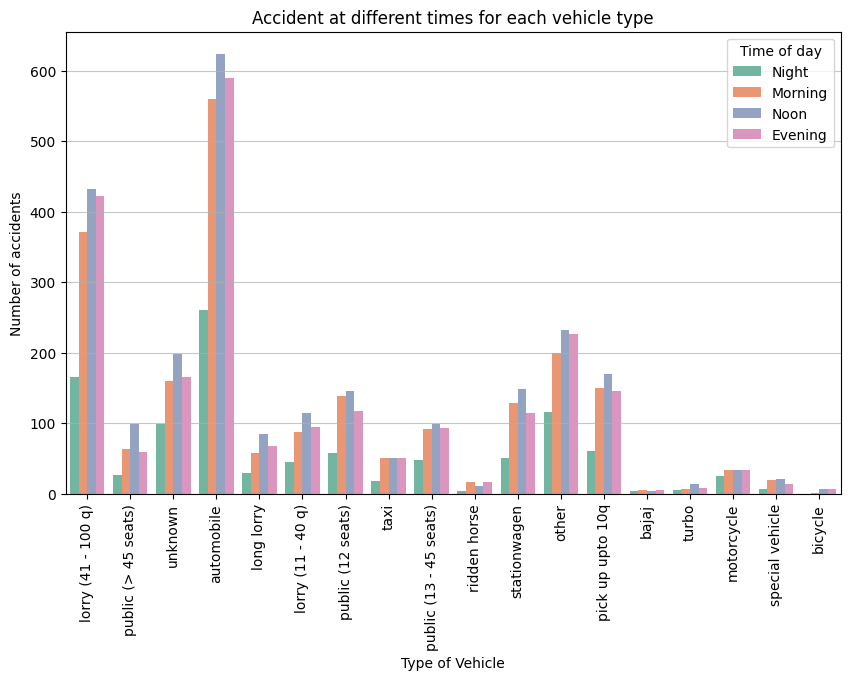

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=without_unknown_casualty, x='Type_of_vehicle', hue='Time_of_day', palette='Set2')
plt.title('Accident at different times for each vehicle type')
plt.xlabel('Type of Vehicle')
plt.ylabel('Number of accidents')
plt.legend(title='Time of day', labels=Time_of_day)
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.7)
plt.show()

The hypothesis is wrong. From the above plot, we can see that most vehicle types are involved in a road accident during noon.<br>
Although one might think that most accidents should occur in the evening or night due to low visibility or sleepiness, but most accidents happen in the noon. This opens up the possibility of finding other factors like road type and vehicle faults, which might contribute to the accidents, and then fixing them.

#### Question 2:
Does the service period of the vehicle and ownership of the vehicle have any correlation with the accidents<br>
The state of vehicle and the person driving it plays an important role in road safety. We need to find out how the state of the vehicle and the ownership of the vehicle affect the possibility of a vehicle to be involved in an accident. This study will help in making policies and rules to reduce road accidents and related casualties.

##### Hypothesis 1: The vehicles which are serviced regularly have less chances of getting involved in accidents as they are less prone to machine malfunction

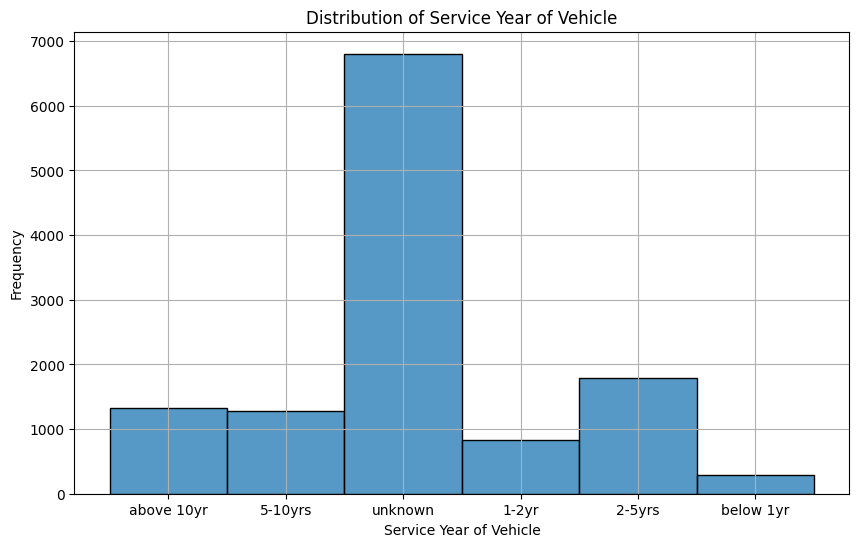

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_dataset['Service_year_of_vehicle'].astype(str), bins=30, kde=False)
plt.title('Distribution of Service Year of Vehicle')
plt.xlabel('Service Year of Vehicle')
plt.ylabel('Frequency')
plt.grid()
plt.show()

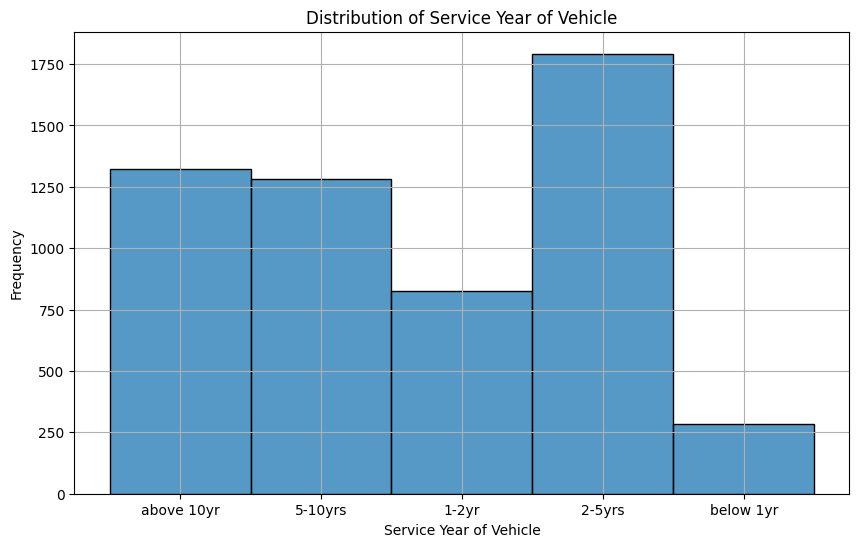

In [23]:
# remove data entries with 'unknown' service period
without_unknown_service = cleaned_dataset[cleaned_dataset['Service_year_of_vehicle'] != 'unknown']
plt.figure(figsize=(10, 6))
sns.histplot(without_unknown_service['Service_year_of_vehicle'].astype(str), bins=30, kde=False)
plt.title('Distribution of Service Year of Vehicle')
plt.xlabel('Service Year of Vehicle')
plt.ylabel('Frequency')
plt.grid()
plt.show()

The hypothesis is correct. From the above bar graph, we can see that the vehicles with last service data less than a year ago are involved in much fewer accidents when compared to the vehicles that had last service done more than a year ago.<br>
This data is useful in implementing stricter policies in regards to the regular servicing of the vehicles.

##### Hypothesis 2: Ownership of the vehicle doesn't have any relation to the accidents. The person driving a vehicle is equally likely to be involved in an accident regardless of the ownership of the vehicle he/she drives

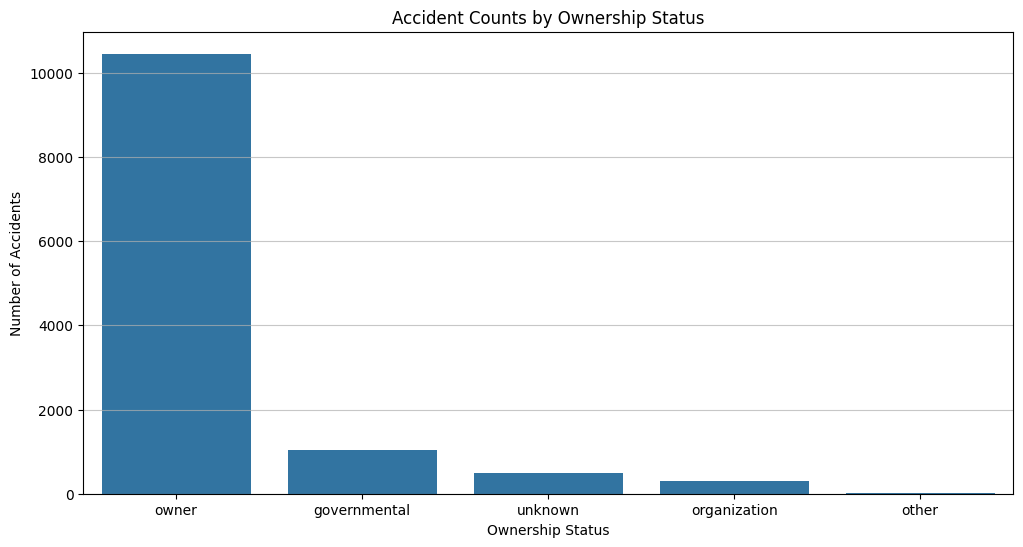

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(data=cleaned_dataset, x='Owner_of_vehicle', order=cleaned_dataset['Owner_of_vehicle'].value_counts().index)
plt.title('Accident Counts by Ownership Status')
plt.xlabel('Ownership Status')
plt.ylabel('Number of Accidents')
plt.grid(axis='y', alpha=0.7)
plt.show()

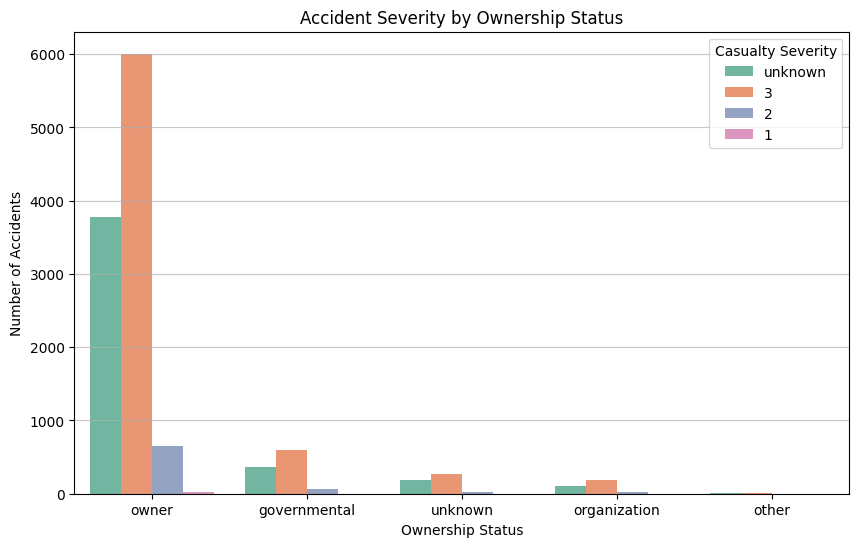

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_dataset, x='Owner_of_vehicle', hue='Casualty_severity', palette='Set2')
plt.title('Accident Severity by Ownership Status')
plt.xlabel('Ownership Status')
plt.ylabel('Number of Accidents')
plt.legend(title='Casualty Severity')
plt.grid(axis='y', alpha=0.7)
plt.show()

The hypothesis that ownership of vehicle doesn't play role in accidents is incorrect. From the above two plots, we can see that a person is more likely to be involved in a accident if they own the vehicle.